### YouTube Comments Sentiment Analysis 

Using Natural Language Processing (NLP) techniques and Machine Learning (ML) algorithms to parse and classify YouTube comments as predicted positive (1) or negative (0).

#### Goals and Objectives
- The goal of this project is to identify cat and/or dog owners based on YouTube video comments, so that we could recommend relevant topics that they might be interested in, and further, to identify video creators with the most viewers that attract pet owners, specifically cat and/or dog owners.
- In addition, through this project we could gain a more in-depth understanding of how word usage can be indicative of overall user sentiment towards approval of videos on social media platforms.
- More interestingly, we could learn about NLP and how ML models can be used to comprehend, analyze, and classify human language and emotions through texts.

- Ellie Ziyi Zhu | ziyizhu74@gmail.com

**The dataset is 240MB compressed (630MB original). It is comma separated, with a header line defining the field names, listed below:**
- creator_name: Name of the YouTube channel creator.
- userid: Integer identifier for the users commenting on the YouTube channels.
- comment: Text of the comments made by the users.

**This project consists of a few steps:**
- Identify cat and/or dog owners: Find the users who are cat and/or dog owners.
- Build and evaluate classifiers: Build classifiers for the cat and dog owners and measure the performance of the classifiers.
- Classify all the users: Apply the cat/dog classifiers to all the users in the dataset. Estimate the fraction of all users who are cat/dog owners.
- Extract insights about cat and/or dog owners: Find topics important to cat and dog owners.
- Identify creators with cat and/or dog owners in the audience: Find creators with the most cat and/or dog owners. Find creators with the highest statistically significant percentages of cat and/or dog owners.

In [4]:
import urllib.request
urllib.request.urlretrieve("https://drive.google.com/file/d/1o3DsS3jN_t2Mw3TsV0i7ySRmh9kyYi1a/view?usp=sharing", "/tmp/animals_comments.csv")
#dbutils.fs.mv("/FileStore/tables/animals_comments.csv", "dbfs:/ez/projects_data/animals_comments.csv")  

Out[ 1 ]: ('/tmp/animals_comments.csv', <http.client.HTTPMessage at 0x7f69c31788d0>)

In [5]:
animals_comments = spark.read.load("dbfs:/ez/projects_data/animals_comments.csv", format='csv', header = True)

### 0.1. Data Cleaning & Labeling

In [7]:
data_path = "dbfs:/ez/projects_data/animals_comments.csv"
df = spark.read.format("csv").option("inferSchema", "true").option("header","true").load(data_path)
display(df.take(5))

creator_name,userid,comment
Doug The Pug,87.0,I shared this to my friends and mom the were lol
Doug The Pug,87.0,Super cute 😀🐕🐶
bulletproof,530.0,stop saying get em youre literally dumb . have some common sense or dont own this kind of dog. fucking retarded I swear
Meu Zoológico,670.0,Tenho uma jiboia e um largato
ojatro,1031.0,I wanna see what happened to the pigs after that please


In [8]:
#Count data size
df.count() 

Out[ 4 ]: 5820035

In [9]:
#Drop missing value and count data size again
df_clean = df.na.drop(subset = ["comment"])
df_clean.count()

Out[ 5 ]: 5818984

In [10]:
display(df_clean.take(5))

creator_name,userid,comment
Doug The Pug,87.0,I shared this to my friends and mom the were lol
Doug The Pug,87.0,Super cute 😀🐕🐶
bulletproof,530.0,stop saying get em youre literally dumb . have some common sense or dont own this kind of dog. fucking retarded I swear
Meu Zoológico,670.0,Tenho uma jiboia e um largato
ojatro,1031.0,I wanna see what happened to the pigs after that please


In [11]:
#Find user who is a dog/cat owner
from pyspark.sql.functions import when
from pyspark.sql.functions import col
from pyspark.sql.types import *

df_clean = df_clean.withColumn("label", \
                           (when(col("comment").like("%my dog%"), 1) \
                           .when(col("comment").like("%I have a dog%"), 1) \
                           .when(col("comment").like("%my cat%"), 1) \
                           .when(col("comment").like("%I have a cat%"), 1) \
                           .when(col("comment").like("%my puppy%"), 1) \
                           .when(col("comment").like("%my pup%"), 1) \
                           .when(col("comment").like("%my kitty%"), 1) \
                           .when(col("comment").like("%my pussy%"), 1) \
                           .otherwise(0))) 

In [12]:
#Display data after labeling
display(df_clean.take(5))

creator_name,userid,comment,label
Doug The Pug,87.0,I shared this to my friends and mom the were lol,0
Doug The Pug,87.0,Super cute 😀🐕🐶,0
bulletproof,530.0,stop saying get em youre literally dumb . have some common sense or dont own this kind of dog. fucking retarded I swear,0
Meu Zoológico,670.0,Tenho uma jiboia e um largato,0
ojatro,1031.0,I wanna see what happened to the pigs after that please,0


### 0.2. Feature Engineering / Exploratory Data Analysis (EDA)

In [14]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
        .master("local") \
        .appName("Word Count") \
        .config("spark.some.config.option", "some-value") \
        .getOrCreate()

In [15]:
df_clean.describe(["label"]).show()

+-------+-------------------+
summary| label|
+-------+-------------------+
 count| 5818984|
 mean|0.00691271878389767|
 stddev| 0.0828548989659657|
 min| 0|
 max| 1|
+-------+-------------------+

In [16]:
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import udf

slen = udf(lambda s: len(s), IntegerType())

df_clean = df_clean.withColumn("length", slen(df_clean.comment))
df_clean.describe(["length"]).show()

+-------+------------------+
summary| length|
+-------+------------------+
 count| 5818984|
 mean| 77.3351729442803|
 stddev|140.07438101196328|
 min| 1|
 max| 10000|
+-------+------------------+

In [17]:
df_clean.createOrReplaceTempView("df_clean")
df_max_len = spark.sql("SELECT comment FROM df_clean WHERE length = 10000")
display(df_max_len)

comment


In [18]:
display(df_clean.select("userid", "length"))

userid,length
87.0,48
87.0,15
530.0,119
670.0,29
1031.0,56
1212.0,23
1806.0,154
2036.0,71
2637.0,21
2698.0,20


- Binary (0 or 1) labels are highly imbalanced.
- Length is not normally distribured, usually under 200 characters.
- Two users who have the max. length of comments seem to extremely adore animals. 
  - however, in spite of the length of these comments, it does not necessarily mean they are pet owners.
    - this is still useful since we could explain how/why we chose to label our data.

### 1. Data Preprocessing to Build a Classifier

In [21]:
from pyspark.ml import Pipeline
stages = [] #Stages in our Pipeline

In [22]:
from pyspark.ml.feature import RegexTokenizer, Word2Vec
regexTokenizer = RegexTokenizer(inputCol = "comment", outputCol = "words", pattern = "\\W")
stages += [regexTokenizer]
word2Vec = Word2Vec(inputCol = "words", outputCol = "features")
stages += [word2Vec]

In [23]:
from pyspark.ml.classification import LogisticRegression
pipeline = Pipeline().setStages(stages)

#Fit the pipeline to training documents
pipelineFit = pipeline.fit(df_clean)
dataset = pipelineFit.transform(df_clean)

In [24]:
display(dataset.take(5))

creator_name,userid,comment,label,length,words,features
Doug The Pug,87.0,I shared this to my friends and mom the were lol,0,48,"List(i, shared, this, to, my, friends, and, mom, the, were, lol)","List(1, 100, List(), List(0.08180291713638739, 0.1178917373445901, 0.019071154719726608, 0.018788798627528278, 0.12748982270502232, -0.08801021448082545, -0.005578358509493145, 0.045883881097490135, 0.18084576988423412, -0.12443837337195873, -0.008201104673472319, 0.022399257826195524, 0.10433521409603683, -0.13759858110411602, -0.07922319659304446, -0.07748949222944, -0.09738163353705949, -0.12160215416753835, 0.10944066162813794, 0.07945947389287705, 0.04058738120577552, 0.012584471567110582, -0.06694218855012547, 0.040779413232071834, -0.06746575477617708, 0.022908735427666794, 0.022976001555269417, -0.05122360612519763, 0.0295031323436309, -0.020757548849691044, 0.043222028254107994, -0.12427412210540338, 0.09089883061295206, -0.005693622060458769, -0.028293423693288456, 0.058319932696494194, -0.009404921099882235, -0.03721752005036582, -0.10641450595787981, 0.09165227074514735, 0.014882833104241978, 0.006682159040461887, -0.06959888838570226, 0.11260013570162383, 0.046145132658156486, -0.11035700531845744, 0.11425779116424647, -0.05011669427833774, -0.07387669003483924, 0.10289290022443641, 0.08068307098107073, -0.0410704732533883, 0.12558597072281621, 0.05092725267803127, -0.2682772312651981, 0.07076059959151529, -0.09669278407554058, 0.00585109664296562, -0.10521584376692772, 0.0076138302048837595, -0.07843799416811884, -0.006141565316780047, -0.05104780540039593, -0.1316086638041518, -0.09320728348525749, -0.07427897304296494, -0.04162996842271902, -0.1323368904942816, -0.08234059063463726, 0.007973846810107882, 0.035686206157234585, 0.059503233060240746, -0.02982694520191713, 0.014974398961798712, -0.0882874612950466, 0.09490606612102552, 0.03399850961498239, -0.011399280597371135, -0.08355528849642724, -0.0696052537215027, -0.04047043570740656, -0.04401166127486662, 0.08576959096403285, 0.006290072151883082, 0.02282302708111026, -0.06565933860838413, 0.08004152334549211, -0.09233813936060126, -0.07456689250168645, 0.007059394381940365, -0.03549328810450706, -0.07073681479827924, -0.021563207264989614, 0.052201439922844824, 0.07217373842881485, -0.19765957614237611, -0.035898251120339744, -0.17837703685191544, 0.14604944668032907, -0.04964039390060035))"
Doug The Pug,87.0,Super cute 😀🐕🐶,0,15,"List(super, cute)","List(1, 100, List(), List(0.36919793486595154, 0.12396498396992683, -0.0020042769610881805, 0.21754381945356727, 0.09108992759138346, -0.3814975991845131, 0.17457105964422226, -0.0265684574842453, 0.2396022453904152, 0.2015264369547367, -0.07797596603631973, 0.3221576362848282, -0.20577801018953323, 0.0011306218802928925, 0.03191807121038437, 0.30295586213469505, -0.30839812755584717, -0.003427106887102127, 0.015293111326172948, 0.211595943197608, 0.23107649385929108, -0.12997543439269066, 0.14872403256595135, 0.12247640453279018, 0.24156925827264786, -0.09424127638339996, -0.001272117719054222, 0.19678444415330887, 0.02987103909254074, -0.2604355178773403, 0.13128956407308578, 0.025382060557603836, 0.019089397974312305, 0.17870661057531834, 0.10880958288908005, 0.13092958030756563, -0.1315240003168583, -0.15598440542817116, -0.1322769969701767, 0.3302689343690872, 0.08782995957881212, 0.09691961482167244, 0.009993501007556915, -0.0901954174041748, -0.0672584529966116, -0.03259915113449097, -0.009771265089511871, 0.15919964015483856, 0.33144518733024597, -0.03249874268658459, -0.19665645062923431, -0.158456202596426, -0.10880213603377342, -0.22796960175037384, -0.25022900104522705, 0.18987146369181573, 0.17356685549020767, 0.30765847861766815, 0.034635502845048904, 0.22344189509749413, 0.00416901707649231, -0.210937961935997, 0.2015740368515253, 0.010051675140857697, 0.13261181768029928, 0.041519477032124996, 0.004106290638446808, -0.26133013516664505, -0.338788278400898, -0.013759873807430267, -0.11222558154258877, 0

In [25]:
(lable0_train, lable0_test) = dataset.filter(col('label') == 1).randomSplit([0.7, 0.3], seed = 100)
(lable1_train, lable1_ex) = dataset.filter(col('label') == 0).randomSplit([0.005, 0.995], seed = 100)
(lable1_test, lable1_ex2) = lable1_ex.randomSplit([0.002, 0.998], seed = 100)

In [26]:
trainingData = lable0_train.union(lable1_train)
testData = lable0_test.union(lable1_test)

In [27]:
display(trainingData.take(5))

creator_name,userid,comment,label,length,words,features
null,1509707.0,It seems some of you snowflakes have never witness Mother Nature before 😂 if my dog got in to a tussle with a snake Id help it out but a cat? Please! Id just get in its way. My cats have killed more snakes than I could count. From harmless grass snakes to copper heads. I wouldnt force my cat to fight a snake but I wouldnt interfere either.And yeah if I had a camera Id probably film it.,1,388,"List(it, seems, some, of, you, snowflakes, have, never, witness, mother, nature, before, if, my, dog, got, in, to, a, tussle, with, a, snake, id, help, it, out, but, a, cat, please, id, just, get, in, its, way, my, cats, have, killed, more, snakes, than, i, could, count, from, harmless, grass, snakes, to, copper, heads, i, wouldnt, force, my, cat, to, fight, a, snake, but, i, wouldnt, interfere, either, and, yeah, if, i, had, a, camera, id, probably, film, it)","List(1, 100, List(), List(-0.01276484807906083, 0.07139015961232112, 0.06608245362633769, 0.006085630479752074, 0.017788674785531585, 0.02421498730707961, 0.042301556435885214, -0.00107747574537238, 0.05386842998876413, -0.10508013619227877, 0.05708126883063748, 0.11335827539898927, 0.03604829126579946, -0.0688110308093903, -0.04810344177862641, -0.006766507567106923, -0.04681138399858735, -0.11876682931545508, 0.06496253255990488, 0.005255317810592772, 0.012432582496215597, -0.03946735797143435, -0.01626675359350688, 0.026008728372899793, 0.014203480618734714, 0.02960059079164757, -0.02947687349411883, -0.02093555747687557, 0.08775852017157676, 0.033012801710563366, -0.009595852911095076, -0.0324349839496721, -0.0173097830088927, 0.0622227663127116, -0.07858763033040811, 0.016386409502334987, 0.001970514985202234, -0.0442390978583901, -0.09386192949170459, 0.05271145482245491, 0.10844613438990863, 0.01740276626947843, 0.020652174118529015, 0.0979429132812008, 0.026741529626276673, -0.011316572442721528, 0.016134747038772213, -0.013910552800173061, -0.08019165681009004, 0.0575669151671891, 0.026056795475320724, -0.06013701460029505, 0.07046523573071566, -0.005490482737652108, -0.20970697036967909, 0.051785679399242175, -0.08444386262953564, 0.006054377909808691, -0.047067207192907794, -0.03984103979737368, -0.04948258431167106, -0.05935792637918191, -0.13838643522909547, -0.11689087373051274, -0.0506550225523548, -0.1475802102904248, 0.07756539573892951, -0.19147024417879602, 0.03385228196842761, -0.03675486046903401, -0.030375558785693365, -0.03607967358577666, 0.03866810751990474, -0.020989874271746676, -0.04809613012129594, 0.048786580860997915, 0.037314386613949944, 0.012937167105323905, -0.03729941995955909, -0.09848700528610733, -0.05615551726409246, -0.03360296482856892, 0.08755658132825754, 0.03759411100557522, 0.08780000380039969, 0.003734630850862853, 0.04219808383502915, 0.01013713200057892, -0.05960453304320668, -0.043932314850154176, 0.030646694433960852, -0.021494264708525394, 0.01808324157955903, 0.1517301496889006, 0.05587395529639966, -0.10317118509224604, -0.011727077109132057, -0.23545588336036175, 0.16440528317625763, 0.07218677415497766))"
null,1931756.0,I have seen my cat bitch smack the heavens tibetsy out of racoons where I live She is protecting her food Because they try to eat it up. I also used to have a pet corn snake that I bought from a pet store a long time ago. It was a cute pink colored albino with red eyes.,1,271,"List(i, have, seen, my, cat, bitch, smack, the, heavens, tibetsy, out, of, racoons, where, i, live, she, is, protecting, her, food, because, they, try, to, eat, it, up, i, also, used, to, have, a, pet, corn, snake, that, i, bought, from, a, pet, store, a, long, time, ago, it, was, a, cute, pink, colored, albino, with, red, eyes)","List(1, 100, List(), List(0.04162616194863121, 0.07066776227820183, 0.13060134748831906, 0.02622292283521002, 0.1437359626529385, -0.06836747707285244, 0.12434868342925569, 0.04187036337178393, 0.06435880274511874, -0.13802466366504287, 0.10

In [28]:
display(testData.take(5))

creator_name,userid,comment,label,length,words,features
Aaron Rift,2212898.0,I need two of these Donald pet toys one of for my cat and one for my dog.,1,73,"List(i, need, two, of, these, donald, pet, toys, one, of, for, my, cat, and, one, for, my, dog)","List(1, 100, List(), List(-0.06632056873705652, 0.12521013244986534, 0.09893663103381792, -0.0018561736991008122, 0.06301288622327976, 0.0017763701422760883, -0.02776657329458329, 0.0946149492325882, 0.043075215045569666, -0.21076033655036652, 0.01420967373996973, 0.06075080815288755, 0.012143352948543098, 0.07743203721798232, -0.019459295538884664, 2.619003514862723E-4, -0.11150379857927974, -0.14007639274415043, 0.12734566018399265, 0.04804282425902784, 0.013139724291654095, -0.036743764455119766, -0.10495786513719293, -0.02335130992448992, -0.08676910990228255, 0.008483119567649232, 0.02222189483129316, -0.06137119295696417, 0.09798021179934342, 0.04783873146192895, -0.025719641293916434, -0.13747850598560438, 0.03082824187974135, 0.04449725885772043, 0.03981956229027774, -0.047497468534857035, 0.03125386545434594, 0.0023429391698704823, -0.03895708486541278, 0.03732107848756843, 0.09975584058298004, 0.041537980549037457, 0.007160021224990487, 0.08714742192791568, 0.13084184461169773, -0.03370579109630651, 0.14726921952226094, -0.07134534873896174, 0.026338897774823837, 0.03527916512555546, 0.0210203456485437, -0.07046741966365112, 0.05271679378994223, -0.08899249712056997, -0.28161717806425357, 0.07818105340831809, -0.2110768696034534, -0.05308769715742932, -0.16753371163374847, -0.0024256206945412685, -0.0019329339637705642, -0.006342979122160209, -0.07806836078978246, -0.12900514879988298, -0.07316570496186614, -0.11005919364591439, 0.02252944413986471, -0.13883391695304048, -0.017688480205833912, 0.0927894323443373, 0.010156638816826873, 0.06521182137334512, -0.05939045476002825, 0.03174243479346235, 0.010051077904386653, 0.029237914791641135, -0.05779261990553802, 0.023772079394095473, 0.005529451287455029, 0.02283552444229523, -0.08276498281500405, -0.04601217009541061, 0.21145272461904419, -0.005867239501741197, 0.1385697985274924, -0.018467219649917547, 0.028686705666283764, 0.0782571363573273, -0.05137505790076425, -0.027797764322410025, -0.0054619622727235155, -0.08351232266674438, 0.06443737925858133, 0.09198261973344617, 0.0780561740975827, -0.1748149659898546, -0.12131619287861717, -0.16556026393340692, 0.15071934461593628, 0.07137477366874614))"
Aarons Animals,426857.0,hey Aron I made a video with my cat! You inspired me !!! I am a big fan of you! Do you have any tips for me? thank you!,1,119,"List(hey, aron, i, made, a, video, with, my, cat, you, inspired, me, i, am, a, big, fan, of, you, do, you, have, any, tips, for, me, thank, you)","List(1, 100, List(), List(-0.006239873091025011, 0.1424485076318628, 0.012552479024244738, -0.08420034551194736, 0.018908840882691687, 0.08698783375855003, 0.045758601011974466, -0.009464127078120197, 0.02411872540999736, -0.14113327380203242, -0.050870727947247875, 0.15885713270732335, 0.009726170600125832, -0.050331907612936835, 0.04390787142048274, 0.009207793993742337, 0.01642641854206366, -0.15456162356089667, -0.004107970744371414, 0.04808235759015896, 0.11027023486427164, -0.11244380454133664, 0.029620165554141358, -0.10769993330385269, 0.0349426131828555, 0.007115834259561129, -0.006260766593706129, -0.04656638797106487, 0.058224218365337164, 0.13543481914010563, -0.07859679230231059, -0.13798266070495757, 0.0438182984944433, 0.017210813405524408, 0.08284212026878127, 0.00898443894194705, -0.033698312688751945, 0.0648840317901756, -0.12102423748001456, 0.1827436772042087, -0.030005417098956447, 0.03165561626000064, -0.06228056164192301, 0.03777664347684809, 0.0632051063169326, -0.09555318427737802, 0.08117697081927742, -0.0693671262623476, -0.0931959350460342, 0.1021899509110621, 0.05321206637225779, -0.047036878498537195, 0.030067404761211947, 0.01956313582403319, -0.0623344091166343, 0.053993606806865754, -0.05398318

In [29]:
print("Dataset Count: " + str(dataset.count()))
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Dataset Count: 5818984
Training Dataset Count: 56905
Test Dataset Count: 23339

In [30]:
#Keep relevant columns
cols = dataset.columns
selectedcols = ["label", "features"] + cols
dataset = dataset.select(selectedcols)
display(dataset.take(5))

label,features,creator_name,userid,comment,label,length,words,features
0,"List(1, 100, List(), List(0.08180291713638739, 0.1178917373445901, 0.019071154719726608, 0.018788798627528278, 0.12748982270502232, -0.08801021448082545, -0.005578358509493145, 0.045883881097490135, 0.18084576988423412, -0.12443837337195873, -0.008201104673472319, 0.022399257826195524, 0.10433521409603683, -0.13759858110411602, -0.07922319659304446, -0.07748949222944, -0.09738163353705949, -0.12160215416753835, 0.10944066162813794, 0.07945947389287705, 0.04058738120577552, 0.012584471567110582, -0.06694218855012547, 0.040779413232071834, -0.06746575477617708, 0.022908735427666794, 0.022976001555269417, -0.05122360612519763, 0.0295031323436309, -0.020757548849691044, 0.043222028254107994, -0.12427412210540338, 0.09089883061295206, -0.005693622060458769, -0.028293423693288456, 0.058319932696494194, -0.009404921099882235, -0.03721752005036582, -0.10641450595787981, 0.09165227074514735, 0.014882833104241978, 0.006682159040461887, -0.06959888838570226, 0.11260013570162383, 0.046145132658156486, -0.11035700531845744, 0.11425779116424647, -0.05011669427833774, -0.07387669003483924, 0.10289290022443641, 0.08068307098107073, -0.0410704732533883, 0.12558597072281621, 0.05092725267803127, -0.2682772312651981, 0.07076059959151529, -0.09669278407554058, 0.00585109664296562, -0.10521584376692772, 0.0076138302048837595, -0.07843799416811884, -0.006141565316780047, -0.05104780540039593, -0.1316086638041518, -0.09320728348525749, -0.07427897304296494, -0.04162996842271902, -0.1323368904942816, -0.08234059063463726, 0.007973846810107882, 0.035686206157234585, 0.059503233060240746, -0.02982694520191713, 0.014974398961798712, -0.0882874612950466, 0.09490606612102552, 0.03399850961498239, -0.011399280597371135, -0.08355528849642724, -0.0696052537215027, -0.04047043570740656, -0.04401166127486662, 0.08576959096403285, 0.006290072151883082, 0.02282302708111026, -0.06565933860838413, 0.08004152334549211, -0.09233813936060126, -0.07456689250168645, 0.007059394381940365, -0.03549328810450706, -0.07073681479827924, -0.021563207264989614, 0.052201439922844824, 0.07217373842881485, -0.19765957614237611, -0.035898251120339744, -0.17837703685191544, 0.14604944668032907, -0.04964039390060035))",Doug The Pug,87.0,I shared this to my friends and mom the were lol,0,48,"List(i, shared, this, to, my, friends, and, mom, the, were, lol)","List(1, 100, List(), List(0.08180291713638739, 0.1178917373445901, 0.019071154719726608, 0.018788798627528278, 0.12748982270502232, -0.08801021448082545, -0.005578358509493145, 0.045883881097490135, 0.18084576988423412, -0.12443837337195873, -0.008201104673472319, 0.022399257826195524, 0.10433521409603683, -0.13759858110411602, -0.07922319659304446, -0.07748949222944, -0.09738163353705949, -0.12160215416753835, 0.10944066162813794, 0.07945947389287705, 0.04058738120577552, 0.012584471567110582, -0.06694218855012547, 0.040779413232071834, -0.06746575477617708, 0.022908735427666794, 0.022976001555269417, -0.05122360612519763, 0.0295031323436309, -0.020757548849691044, 0.043222028254107994, -0.12427412210540338, 0.09089883061295206, -0.005693622060458769, -0.028293423693288456, 0.058319932696494194, -0.009404921099882235, -0.03721752005036582, -0.10641450595787981, 0.09165227074514735, 0.014882833104241978, 0.006682159040461887, -0.06959888838570226, 0.11260013570162383, 0.046145132658156486, -0.11035700531845744, 0.11425779116424647, -0.05011669427833774, -0.07387669003483924, 0.10289290022443641, 0.08068307098107073, -0.0410704732533883, 0.12558597072281621, 0.05092725267803127, -0.2682772312651981, 0.07076059959151529, -0.09669278407554058, 0.00585109664296562, -0.10521584376692772, 0.0076138302048837595, -0.07843799416811884, -0.006141565316780047, -0.05104780540039593, -0.1316086638041518, -0.09320728348525749, -0.07427897304296494, -0.04162996842271902, -0.1323368904942816, -0.08234059063463726, 0.007973846810107882, 0.035686206157234585, 0.05950323306024

### 2. Build Machine Learning Models

#### 2.1. Logistic Regression Model

In [33]:
from pyspark.ml.classification import LogisticRegression

#Create initial LogisticRegression model
lr = LogisticRegression(labelCol = "label", featuresCol = "features", maxIter = 10)

#Train model with Training Data
lrModel = lr.fit(trainingData)

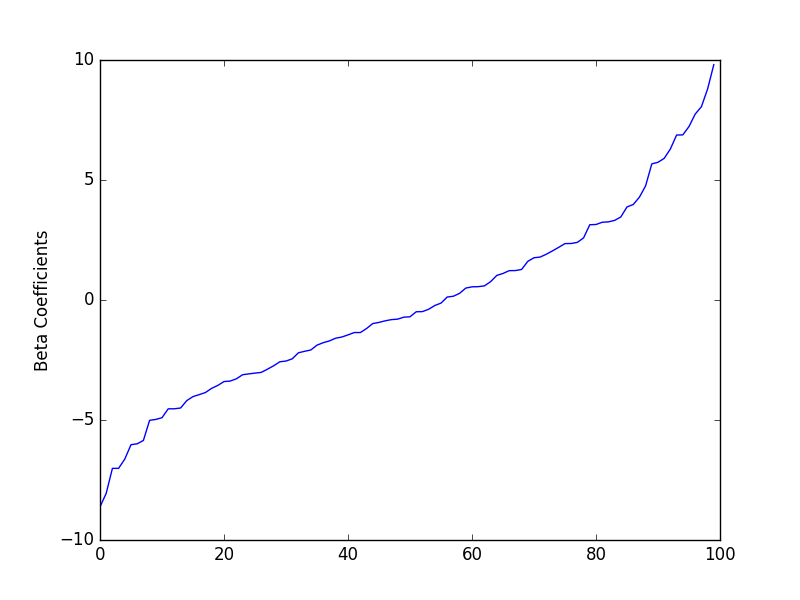

In [34]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel("Beta Coefficients")
display(plt.show())

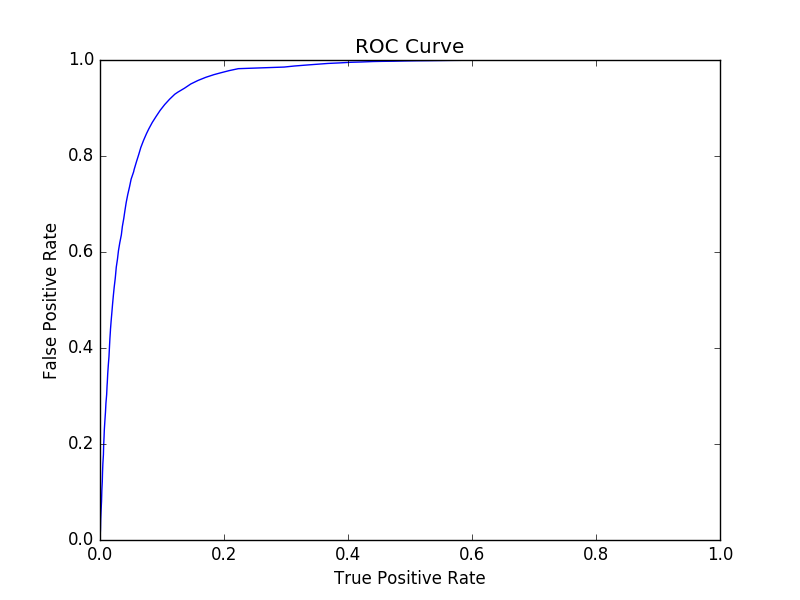

In [35]:
plt.clf() #Clear previous figures

#Plot a ROC curve
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc["FPR"], roc["TPR"])
plt.ylabel("False Positive Rate")
plt.xlabel("True Positive Rate")
plt.title("ROC Curve")
display(plt.show())
#print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

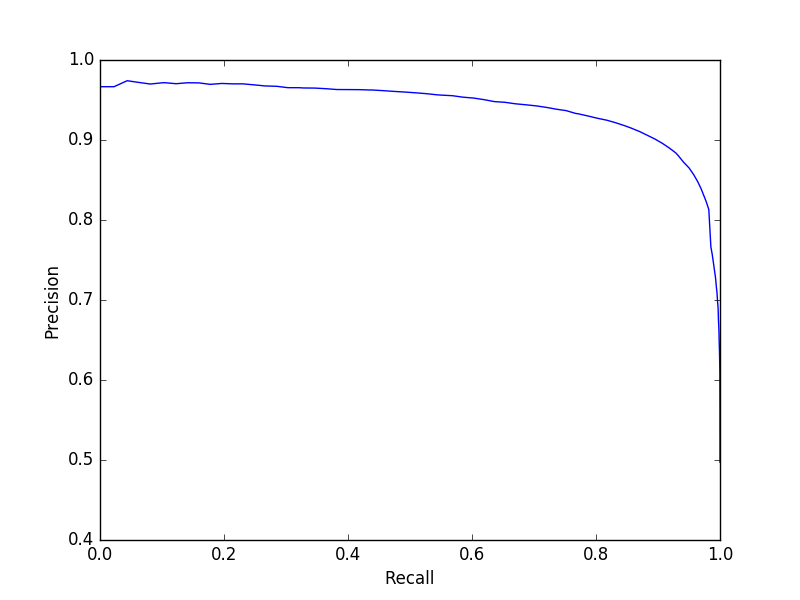

In [36]:
plt.clf() #Clear previous figures

#Plot the curve using precision and recall metrics
pr = trainingSummary.pr.toPandas()
plt.plot(pr["recall"], pr["precision"])
plt.ylabel("Precision")
plt.xlabel("Recall")
display(plt.show())

In [37]:
#Make predictions on test data using the transform() method
#LogisticRegression.transform() will only use the 'features' column
predictions = lrModel.transform(testData)

In [38]:
#View model's predictions and probabilities of each prediction class
selected = predictions.select("label", "prediction", "probability", "userid")
display(selected.take(5))

label,prediction,probability,userid
1,1.0,"List(1, 2, List(), List(2.1639612623740122E-4, 0.9997836038737626))",2212898.0
1,0.0,"List(1, 2, List(), List(0.635458359740899, 0.364541640259101))",426857.0
1,1.0,"List(1, 2, List(), List(0.050268574332116366, 0.9497314256678836))",785631.0
1,1.0,"List(1, 2, List(), List(7.818681200899881E-4, 0.99921813187991))",881725.0
1,0.0,"List(1, 2, List(), List(0.691144216604093, 0.308855783395907))",1351699.0


In [39]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(rawPredictionCol = "rawPrediction")
evaluator.evaluate(predictions)

Out[ 130 ]: 0.9571481347647558

In [40]:
evaluator.getMetricName()

Out[ 131 ]: 'areaUnderROC'

In [41]:
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.957148134764758

#### 2.1.1. Model Hyperparameter Searching for [Logistic Regression Model]
- Parameter Tuning and K-fold cross-validation

In [43]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

#Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [1, 5, 10])
             .build())

In [44]:
#Create 5-fold CrossValidator
cv = CrossValidator(estimator = lr, estimatorParamMaps = paramGrid, evaluator = evaluator, numFolds = 5)

#Run cross validations
cvModel = cv.fit(trainingData)

In [45]:
#Use test set to measure the accuracy of our model on new data
predictions = cvModel.transform(testData)

In [46]:
#cvModel uses the best model found from the Cross Validation
#Evaluate best model
evaluator.evaluate(predictions)

Out[ 136 ]: 0.9572002854193978

In [47]:
#Access the model's feature weights and intercepts
print('Model Intercept: ', cvModel.bestModel.intercept)

Model Intercept: -1.3864698519150518

In [48]:
weights = cvModel.bestModel.coefficients
weights = [(float(w),) for w in weights]  #Convert numpy type to float, and to tuple
weightsDF = sqlContext.createDataFrame(weights, ["Feature Weight"])
display(weightsDF.take(5))

Feature Weight
6.0199049243569105
-2.9910822464718945
2.0802701252376155
-5.107498976704992
-1.2901005183350582


In [49]:
#View best model's predictions and probabilities of each prediction class
selected = predictions.select("label", "prediction", "probability", "userid")
display(selected.take(5))

label,prediction,probability,userid
1,1.0,"List(1, 2, List(), List(0.0030384501816650613, 0.996961549818335))",2212898.0
1,0.0,"List(1, 2, List(), List(0.6209768843404844, 0.37902311565951563))",426857.0
1,1.0,"List(1, 2, List(), List(0.12530285612361738, 0.8746971438763826))",785631.0
1,1.0,"List(1, 2, List(), List(0.0062040665484739315, 0.993795933451526))",881725.0
1,0.0,"List(1, 2, List(), List(0.6294679079083451, 0.3705320920916549))",1351699.0


#### 2.2. Decision Tree Classifier

In [51]:
from pyspark.ml.classification import DecisionTreeClassifier

#Create initial Decision Tree Model
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3) 

#Train model with Training Data
dtModel = dt.fit(trainingData)

In [52]:
print("numNodes = ", dtModel.numNodes)
print("depth = ", dtModel.depth)

numNodes = 11
depth = 3

In [53]:
display(dtModel)

treeNode
"{""index"":5,""featureType"":""continuous"",""prediction"":null,""threshold"":0.011725384776820473,""categories"":null,""feature"":46,""overflow"":false}"
"{""index"":1,""featureType"":""continuous"",""prediction"":null,""threshold"":0.12763356197212417,""categories"":null,""feature"":63,""overflow"":false}"
"{""index"":0,""featureType"":null,""prediction"":0.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":3,""featureType"":""continuous"",""prediction"":null,""threshold"":0.029470708296129123,""categories"":null,""feature"":18,""overflow"":false}"
"{""index"":2,""featureType"":null,""prediction"":1.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":4,""featureType"":null,""prediction"":0.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":9,""featureType"":""continuous"",""prediction"":null,""threshold"":0.08330247193584814,""categories"":null,""feature"":18,""overflow"":false}"
"{""index"":7,""featureType"":""continuous"",""prediction"":null,""threshold"":0.08691346754785628,""categories"":null,""feature"":63,""overflow"":false}"
"{""index"":6,""featureType"":null,""prediction"":0.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"
"{""index"":8,""featureType"":null,""prediction"":1.0,""threshold"":null,""categories"":null,""feature"":null,""overflow"":false}"


In [54]:
#Use test set to measure the accuracy of our model on new data
predictions = dtModel.transform(testData)

In [55]:
#View model's predictions and probabilities of each prediction class
display(predictions.select("label", "prediction", "probability", "userid").take(5))

label,prediction,probability,userid
1,0.0,"List(1, 2, List(), List(0.797752808988764, 0.20224719101123595))",2212898.0
1,1.0,"List(1, 2, List(), List(0.20282745699199456, 0.7971725430080054))",426857.0
1,1.0,"List(1, 2, List(), List(0.20282745699199456, 0.7971725430080054))",785631.0
1,1.0,"List(1, 2, List(), List(0.20282745699199456, 0.7971725430080054))",881725.0
1,1.0,"List(1, 2, List(), List(0.20282745699199456, 0.7971725430080054))",1351699.0


In [56]:
predictions.printSchema()

root
-- creator_name: string (nullable = true)
-- userid: double (nullable = true)
-- comment: string (nullable = true)
-- label: integer (nullable = false)
-- length: integer (nullable = true)
-- words: array (nullable = true)
 |-- element: string (containsNull = true)
-- features: vector (nullable = true)
-- rawPrediction: vector (nullable = true)
-- probability: vector (nullable = true)
-- prediction: double (nullable = false)

In [57]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.838584209207913

In [58]:
dt.getImpurity() 

#Entropy and the Gini coefficient are the supported measures of impurity for Decision Trees. This is ``Gini`` by default. Changing this value is simple, model.setImpurity("Entropy")

Out[ 37 ]: 'gini'

#### 2.2.1. Model Hyperparameter Searching for [Decision Tree Classifier]
- Parameter Tuning and K-fold cross-validation

In [60]:
#Create ParamGrid for Cross Validation
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [1, 2, 6, 10])
             .addGrid(dt.maxBins, [20, 40, 80])
             .build())

In [61]:
#Create 5-fold CrossValidator
cv = CrossValidator(estimator = dt, estimatorParamMaps = paramGrid, evaluator = evaluator, numFolds = 5)

#Run cross validations
cvModel = cv.fit(trainingData)

In [62]:
print("numNodes = ", cvModel.bestModel.numNodes)
print("depth = ", cvModel.bestModel.depth)

numNodes = 1119
depth = 10

In [63]:
#Use test set to measure the accuracy of our model on new data
predictions = cvModel.transform(testData)

In [64]:
# cvModel uses the best model found from the Cross Validation
# Evaluate best model
evaluator.evaluate(predictions)

Out[ 42 ]: 0.9251043090238839

In [65]:
#View Best model's predictions and probabilities of each prediction class
selected = predictions.select("label", "prediction", "probability", "userid")
display(selected.take(5))

label,prediction,probability,userid
1,1.0,"List(1, 2, List(), List(0.11921708185053381, 0.8807829181494662))",2212898.0
1,0.0,"List(1, 2, List(), List(0.7946428571428571, 0.20535714285714285))",426857.0
1,1.0,"List(1, 2, List(), List(0.06400949322909395, 0.935990506770906))",785631.0
1,1.0,"List(1, 2, List(), List(0.06400949322909395, 0.935990506770906))",881725.0
1,1.0,"List(1, 2, List(), List(0.3181818181818182, 0.6818181818181818))",1351699.0


#### 2.3. Random Forests Classifier

In [67]:
from pyspark.ml.classification import RandomForestClassifier

#Create an initial RandomForest model
rf = RandomForestClassifier(labelCol = "label", featuresCol = "features")

#Train model with Training Data
rfModel = rf.fit(trainingData)

In [68]:
# Make predictions on test data using the Transformer.transform() method.
predictions = rfModel.transform(testData)

In [69]:
predictions.printSchema()

root
-- creator_name: string (nullable = true)
-- userid: double (nullable = true)
-- comment: string (nullable = true)
-- label: integer (nullable = false)
-- length: integer (nullable = true)
-- words: array (nullable = true)
 |-- element: string (containsNull = true)
-- features: vector (nullable = true)
-- rawPrediction: vector (nullable = true)
-- probability: vector (nullable = true)
-- prediction: double (nullable = false)

In [70]:
#View model's predictions and probabilities of each prediction class
selected = predictions.select("label", "prediction", "probability", "userid")
display(selected.take(5))

label,prediction,probability,userid
1,1.0,"List(1, 2, List(), List(0.32155461452755546, 0.6784453854724446))",2212898.0
1,1.0,"List(1, 2, List(), List(0.47984704852007115, 0.5201529514799288))",426857.0
1,1.0,"List(1, 2, List(), List(0.17572261473158873, 0.8242773852684113))",785631.0
1,1.0,"List(1, 2, List(), List(0.18983092584807557, 0.8101690741519244))",881725.0
1,1.0,"List(1, 2, List(), List(0.42360253130382197, 0.5763974686961781))",1351699.0


In [71]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator() #Evaluate model
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.9480382500438572

#### 2.3.1. Model Hyperparameter Searching for [Random Forests Classifier]
- Parameter Tuning and K-fold cross-validation

In [73]:
#Create ParamGrid for Cross Validation
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = (ParamGridBuilder()
             .addGrid(rf.maxDepth, [2, 4, 6])
             .addGrid(rf.maxBins, [20, 60])
             .addGrid(rf.numTrees, [5, 20])
             .build())

In [74]:
#Create 5-fold CrossValidator
cv = CrossValidator(estimator = rf, estimatorParamMaps = paramGrid, evaluator = evaluator, numFolds = 5)

#Run cross validations.  This can take about 6 minutes since it is training over 20 trees!
cvModel = cv.fit(trainingData)

In [75]:
#Use test set here so we can measure the accuracy of our model on new data
predictions = cvModel.transform(testData)

In [76]:
#cvModel uses the best model found from the Cross Validation
#Evaluate best model
evaluator.evaluate(predictions)

Out[ 52 ]: 0.9518365046265478

In [77]:
#View Best model's predictions and probabilities of each prediction class
selected = predictions.select("label", "prediction", "probability", "userid")
display(selected.take(5))

label,prediction,probability,userid
1,1.0,"List(1, 2, List(), List(0.33249446998742077, 0.6675055300125792))",2212898.0
1,1.0,"List(1, 2, List(), List(0.37630544452065307, 0.6236945554793469))",426857.0
1,1.0,"List(1, 2, List(), List(0.16301596268736074, 0.8369840373126392))",785631.0
1,1.0,"List(1, 2, List(), List(0.16945553647432524, 0.8305444635256748))",881725.0
1,1.0,"List(1, 2, List(), List(0.40991868267347026, 0.5900813173265298))",1351699.0


#### 2.4. Gradient Boosted Tree Classifier

In [79]:
from pyspark.ml.classification import GBTClassifier

#Create initial GradienBoostedTree classifier
gbt = GBTClassifier(maxIter = 10)
#Train model with Training Data
gbtModel = gbt.fit(trainingData)

In [80]:
#View model's predictions and probabilities of each prediction class
predictions = gbtModel.transform(testData)
display(predictions.select("label", "prediction", "probability", "userid").take(5))

label,prediction,probability,userid
1,1.0,"List(1, 2, List(), List(0.10040491052340855, 0.8995950894765914))",2212898.0
1,0.0,"List(1, 2, List(), List(0.8295817968112097, 0.1704182031887903))",426857.0
1,1.0,"List(1, 2, List(), List(0.14494317676788415, 0.8550568232321158))",785631.0
1,1.0,"List(1, 2, List(), List(0.10519791733301781, 0.8948020826669822))",881725.0
1,1.0,"List(1, 2, List(), List(0.4393567730710531, 0.560643226928947))",1351699.0


In [81]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.9427969292448489

#### 2.4.1. Model Hyperparameter Searching for [Gradient Boosted Tree Classifier]
- Parameter Tuning and K-fold cross-validation

In [83]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

#Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 6])
             .addGrid(gbt.maxBins, [20, 60])
             .addGrid(gbt.maxIter, [10, 20])
             .build())

In [84]:
#Create 5-fold CrossValidator
cv = CrossValidator(estimator = gbt, estimatorParamMaps = paramGrid, evaluator = evaluator, numFolds = 5)
#Run cross validations
cvModel = cv.fit(trainingData)

In [85]:
#Use test set to measure the accuracy of our model on new data
predictions = cvModel.transform(testData)

In [86]:
#cvModel uses the best model found from the Cross Validation
evaluator.evaluate(predictions)

Out[ 40 ]: 0.9616732253205031

In [87]:
#View Best model's predictions and probabilities of each prediction class
selected = predictions.select("label", "prediction", "probability", "userid")
display(selected.take(5))

label,prediction,probability,userid
1,1.0,"List(1, 2, List(), List(0.0594689980244609, 0.9405310019755391))",2212898.0
1,0.0,"List(1, 2, List(), List(0.7208337563916202, 0.2791662436083798))",426857.0
1,1.0,"List(1, 2, List(), List(0.10050378860252106, 0.8994962113974789))",785631.0
1,1.0,"List(1, 2, List(), List(0.07190154363552376, 0.9280984563644763))",881725.0
1,1.0,"List(1, 2, List(), List(0.34927619576856495, 0.650723804231435))",1351699.0


### 3. Make Predictions 
- Obtain the best model with the best hyperparameter

#### 3.1. Choose from four algorithms, select one best model:
- To sum up, we have built a binary classification application using PySpark and ML Pipelines API. 
- We tried four algorithms: Logistic Regression, Decision Tree, Random Forests, and Gradient Boosting. 
- Gradient Boosting gives us the best areaUnderROC value of the cross-validation set, meaning Gradient Boosting performed best on our dataset.
- In this project, we will use the bestModel obtained from **Gradient Boosted Tree Classifier** for deployment and use it to generate predictions on the entire dataset.

### 4. Apply and Evaluate Best Model 
- Classify all users
- Use Gradient Boosted Tree Classifier to generate predictions on our dataset

In [90]:
bestModel = cvModel.bestModel #gbt model

#Generate predictions for entire dataset
finalPredictions = bestModel.transform(dataset)

In [91]:
#Evaluate best model
evaluator.evaluate(finalPredictions)

Out[ 43 ]: 0.9631489201804749

In [92]:
finalPredictions.createOrReplaceTempView("finalPredictions") #create a temp view for SQL statement

In [93]:
%sql
SELECT label, COUNT(*) AS count
FROM finalPredictions
GROUP BY label
ORDER BY count

label,count
1,40225
0,5778759


In [94]:
%sql
SELECT prediction, COUNT(*) AS count
FROM finalPredictions
GROUP BY prediction
ORDER BY count

prediction,count
1.0,780651
0.0,5038333


- Acutal positive labels (True Positive, TP): **1%** of all comments
- Predicted positive labels: **13%** of all comments

In [96]:
#Convert to numpy arrays, for data visualization
import numpy as np
y_test = np.array(finalPredictions.select("label").collect())
pred = np.array(finalPredictions.select("prediction").collect())

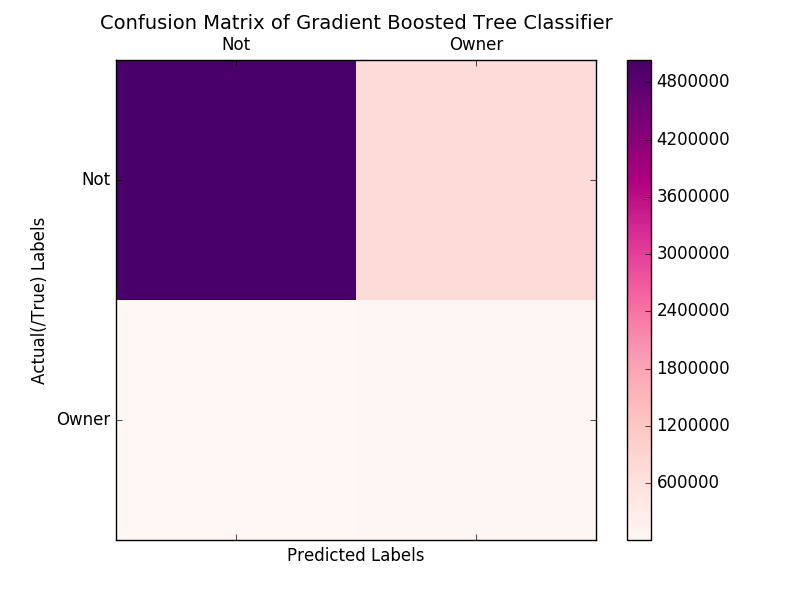

In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

labels = [0, 1]
cm = confusion_matrix(y_test, pred, labels) #passed the labels list to the confusion_matrix function to make sure it's properly sorted, matching the ticks

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap = plt.get_cmap("RdPu"))
fig.colorbar(cax)
plt.title("Confusion Matrix of Gradient Boosted Tree Classifier", fontsize = 14)
ax.set_xticklabels([""] + ["Not", "Owner"]) #change label names on x axis
ax.set_yticklabels([""] + ["Not", "Owner"]) #change label names on y axis
plt.xlabel("Predicted Labels")
plt.ylabel("Actual(/True) Labels")
#show confusion matrix "cm"
display(plt.show())

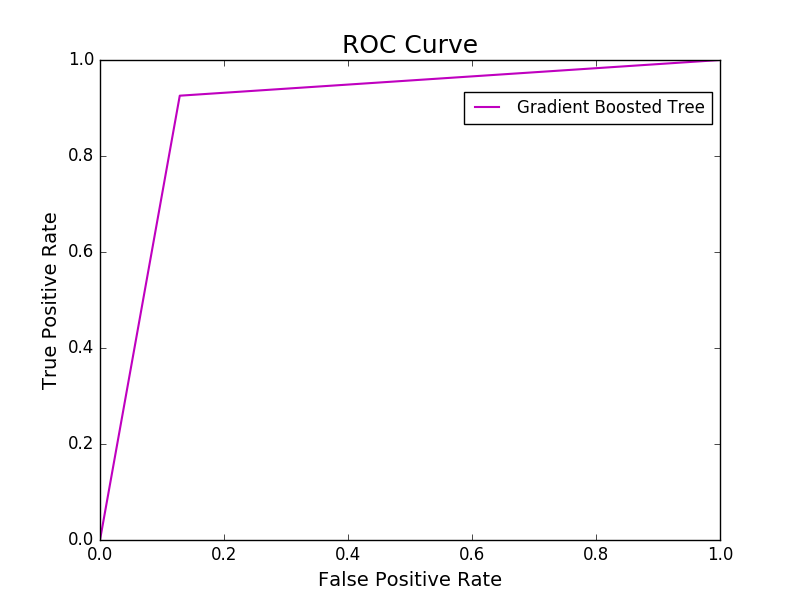

In [98]:
from sklearn.metrics import roc_curve
plt.clf() #Clear previous figures
plt.figure()

fpr_grd, tpr_grd, _ = roc_curve(y_test, pred)
plt.plot(fpr_grd, tpr_grd, color = "m", linewidth = 1.5, label = "Gradient Boosted Tree")
plt.xlabel("False Positive Rate", fontsize = 14)
plt.ylabel("True Positive Rate", fontsize = 14)
plt.title("ROC Curve", fontsize = 18)
plt.legend(labelspacing=0.5, bbox_to_anchor=(1.00, 0.95), fontsize = 12)
display(plt.show())

### 5. Interpret User Comments
- Obtain valuable insignts from users
- Read between words of a text

In [100]:
%sql
SELECT comment
FROM finalPredictions
WHERE label = 1
LIMIT 10

comment
Now I want to try that with my dog!!!
I blow smoke in my cats ear right to his brain
my dog lucky wont eat of his bowl hell only eat out peoples hands how do i get him to eat out of his bowl
thats what my dog do
Im so happy i think Im almost crying Im hugging my dog Ik its not a cat but its a animal that need love
My cat scratches at it I spray at her but not her so it scars her if she keeps doing it I will spray her ya she stoped for a wile then now she is doing it agin ☹️ ya I always like my door shut and if she is in here in the morning she will want out and Im like IM TRYING TO SLEEEP STOOOOP PLZ IM TIRD 😭😭😭😭then someone will let her out and Im like yaaaaas 5 mins of peace but its hard for me to sleep alone like I have to have my kitty or I get sad and lonely and feel kinda unsafe but she make me feel safe and she keeps me safe and I keep her safe!
Since my cat is getting old Im gonna start calling him by a new name..GRANDPAW!!How is cat food sold?USUALLY PURR CAN!!GIVEAWAY ENTRY!!!!
I have several plants of catnip planted around our garden but my cats dont really seem bothered by it? Are my cats constantly high or something???
This is so sad because my dog died and the mom looks just like her and I started crying
my cat died today im sad woching this video


In [101]:
%sql
SELECT comment
FROM finalPredictions
WHERE prediction = 1
LIMIT 10

comment
I shared this to my friends and mom the were lol
when I saw the end it said to adopt I saw different animal sites I was mad that they separated the cute little pups after being together for a long time
That mother cat looks like my own Im guessing she is a russian blue due to her looks and unusual coping skills.
there is no safe way to hold a crab. Somehow they will always manage to nip you!
I dont understand how you think she will make a good service dogs. SD are handled by a company here in Quebec (and given for free fully trained to people in need). For the first year they are fostered by families who expose them to as many things as possible and even then after a year the majority of them are deemed not fit for service work. They have to be ultra confident and never startled never afraid of anything etc... She seem like a good pet but the very opposite of what a service dog should be.
Im not allowed to have a dog because of money and my apartment doesnt allow dogs!! WHAT DO I DO!!!!???!?!?!?!?
Storm is like a giant the other dog bb8(bba babya baby8 i dont know his name.)
Chestnut is so cute. Your videos areuoer helpful for me. Ii dont have a dog yet but learning to train a dog ahead of time is really good for me.
Oh my how crule
Omg i hate how he goes sksksksks every 2 seconds and that sound for some reason is so annoying


In [102]:
from pyspark.sql.functions import col, udf

@udf(ArrayType(StringType())) #employ python user-defined function, tokenization
def splitUdf(x):
    splitted = x.split(' ')
    return [i for i in splitted]

dfv = finalPredictions.withColumn('comment', splitUdf(col('words'))) \
     .select(col('creator_name'), col('userid'), col("prediction"), col('words'))
display(dfv.take(5))

creator_name,userid,prediction,words
Doug The Pug,87.0,1.0,"List(i, shared, this, to, my, friends, and, mom, the, were, lol)"
Doug The Pug,87.0,0.0,"List(super, cute)"
bulletproof,530.0,0.0,"List(stop, saying, get, em, youre, literally, dumb, have, some, common, sense, or, dont, own, this, kind, of, dog, fucking, retarded, i, swear)"
Meu Zoológico,670.0,0.0,"List(tenho, uma, jiboia, e, um, largato)"
ojatro,1031.0,0.0,"List(i, wanna, see, what, happened, to, the, pigs, after, that, please)"


In [103]:
from pyspark.ml.feature import StopWordsRemover

#Natural Language Processing (NLP)
#remove stopWords such as i, you, my, a, the, if, do, does, did, etc.
remover = StopWordsRemover(inputCol = "words", outputCol = "filtered")
dfv = remover.transform(dfv)
display(dfv.take(5))

creator_name,userid,prediction,words,filtered
Doug The Pug,87.0,1.0,"List(i, shared, this, to, my, friends, and, mom, the, were, lol)","List(shared, friends, mom, lol)"
Doug The Pug,87.0,0.0,"List(super, cute)","List(super, cute)"
bulletproof,530.0,0.0,"List(stop, saying, get, em, youre, literally, dumb, have, some, common, sense, or, dont, own, this, kind, of, dog, fucking, retarded, i, swear)","List(stop, saying, get, em, youre, literally, dumb, common, sense, dont, kind, dog, fucking, retarded, swear)"
Meu Zoológico,670.0,0.0,"List(tenho, uma, jiboia, e, um, largato)","List(tenho, uma, jiboia, e, um, largato)"
ojatro,1031.0,0.0,"List(i, wanna, see, what, happened, to, the, pigs, after, that, please)","List(wanna, see, happened, pigs, please)"


In [104]:
from pyspark.sql.functions import explode

df_word = dfv.withColumn("Filtered_Words", explode("filtered")) #explode words
distinct_df_word = df_word.select("Filtered_Words").distinct() #select distinct words
display(distinct_df_word.take(5))

Filtered_Words
hope
still
online
priority
travel


In [105]:
df_word.createOrReplaceTempView("df_word") #create a temp view for SQL statement

In [106]:
%sql
SELECT Filtered_Words, count(*) AS count
FROM df_word
WHERE prediction = 1
GROUP BY 1
ORDER BY count DESC
LIMIT 100

Filtered_Words,count
like,170208
dog,134667
love,134169
one,122533
get,95789
im,89759
cat,84353
dont,70965
know,61866
dogs,60399


- With the help our pre-defined Word Frequency Counter, we are able to interpret top words commented by cat and dog owners.
- User insights: aside from the fact that users may use words like "my %" (this is how we chose to label our data), owners tend to comment with positive sentiment words such as like, really, hope, great, beautiful, care, etc. 
- They also tend to use exclamation marks to express their affectionate feelings for cats and dogs.

### 6. Identify Creators with Cat and Dog Owners in the Audience

In [109]:
%sql
SELECT creator_name, COUNT(*) AS count
FROM finalPredictions
WHERE prediction = 1 
GROUP BY creator_name
ORDER BY count DESC

creator_name,count
Brave Wilderness,68965
The Dodo,63460
Brian Barczyk,47902
Taylor Nicole Dean,46173
Robin Seplut,34696
Hope For Paws - Official Rescue Channel,26264
Gohan The Husky,20837
Vet Ranch,19994
Viktor Larkhill,16485
Think Like A Horse,15767


- We can identify the top-5 creators with cat/dog owners in their audience are:
  - 101rabbits, 2CAN.TV - Ripley the Toucan!, r278pikelk, 1BubbaMike1, and #CameraLord™ · Kor Capital.
- The probability of Dog and cat owners like the videos produced by top creators is high. 
- We could recommend predicted positive-labeled users to subscribe YouTube channels of these top creators, or preferentially recommend videos produced by them.

### 7. Technical and Business Analyses

1) **Project Overview** 
   - The goal of this project is to identify cat and/or dog owners based on YouTube video comments, so that we could recommend relevant topics which they might be interested in, and further to be able to identify video creators with the most viewers that attract pet owners, specifically cat and/or dog owners. 
   - In order to achieve this goal, we performed a YouTube Comments Sentiment Analysis using YouTube video user comments related to animals or pets.

2) **Data Cleaning, Labeling, and Exploratory Data Analysis (EDA)** 
   - Data Cleaning & Feature Engineering (two phases): Dropped null values. Created a Spark Session using SQL to take a closer look at the available features. 
   - Labeling: Manually labeled our data and validated the method by measuring the length of each comment and interpreting the context of each. Implemented Natural Language Processing (NLP) techniques and Machine Learning (ML) algorithms to parse and classify YouTube comments as predicted positive or negative.
   - EDA: Length of comments is not normally distributed, and users who have the max. length of comment do not necessarily to be a cat or dog owners. Actual positive labels occur more likely when we see terms like "my dog", "my cat", "my kitten", etc.
 
3) **ML Pipeline** 
   - We've designed a Machine Learning Pipeline which includes two main stages:
   - The RegexTokenizer model helps convert the categorical variables in the dataset into numeric variables.
   - The Word2Vec algorithms combine all the feature columns into a single vector column called "features".
   
4) **Modeling:** Dealt with imbalanced data using randomSplit re-sampling method before we get into modeling. In this project, we mainly utilized PySpark DataFrame, Spark SQL, SQL, and ``ML-based`` API to train our machine learning models. Four different ML models including Logistic Regression, Decision Tree, Random Forests, and Gradient Boosting.
   
5) **Model Evaluation:** We have built a binary classification application using PySpark and ML Pipelines API. We tried four algorithms, and the Gradient Boosted Tree (GBT) Classifier performed best on our data set.

6) **Data Visualization:** Summarized the best model over the training set and obtained the ROC curve and AUC. Combined Python Scikit-Learn with Matplotlib to produce visualizations for ML models. Plotted a Confusion Matrix to describe the performance of the GBT classifier, our best model.

7) **Recommendations:** Identified top-5 creators (101rabbits, 2CAN.TV - Ripley the Toucan!, r278pikelk, 1BubbaMike1, and #CameraLord™ · Kor Capital) whose videos may be more appealing to cat and dog owners. Recommendations should be made among these top creators' YouTube channels and their videos.

### 8. Reference
- Extracting, transforming and selecting features: https://spark.apache.org/docs/2.1.0/ml-features.html 
- Binary Classification Example: https://docs.databricks.com/spark/latest/mllib/binary-classification-mllib-pipelines.html
- Machine Learning with PySpark and MLlib : https://towardsdatascience.com/machine-learning-with-pyspark-and-mllib-solving-a-binary-classification-problem-96396065d2aa
- Sklearn plot confusion matrix with labels: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels